# GenAI with Python

###### [Article: TowardsDataScience](https://towardsdatascience.com/genai-with-python-rag-with-llm-complete-tutorial-c276dda6707b)

### Data

pages: 96


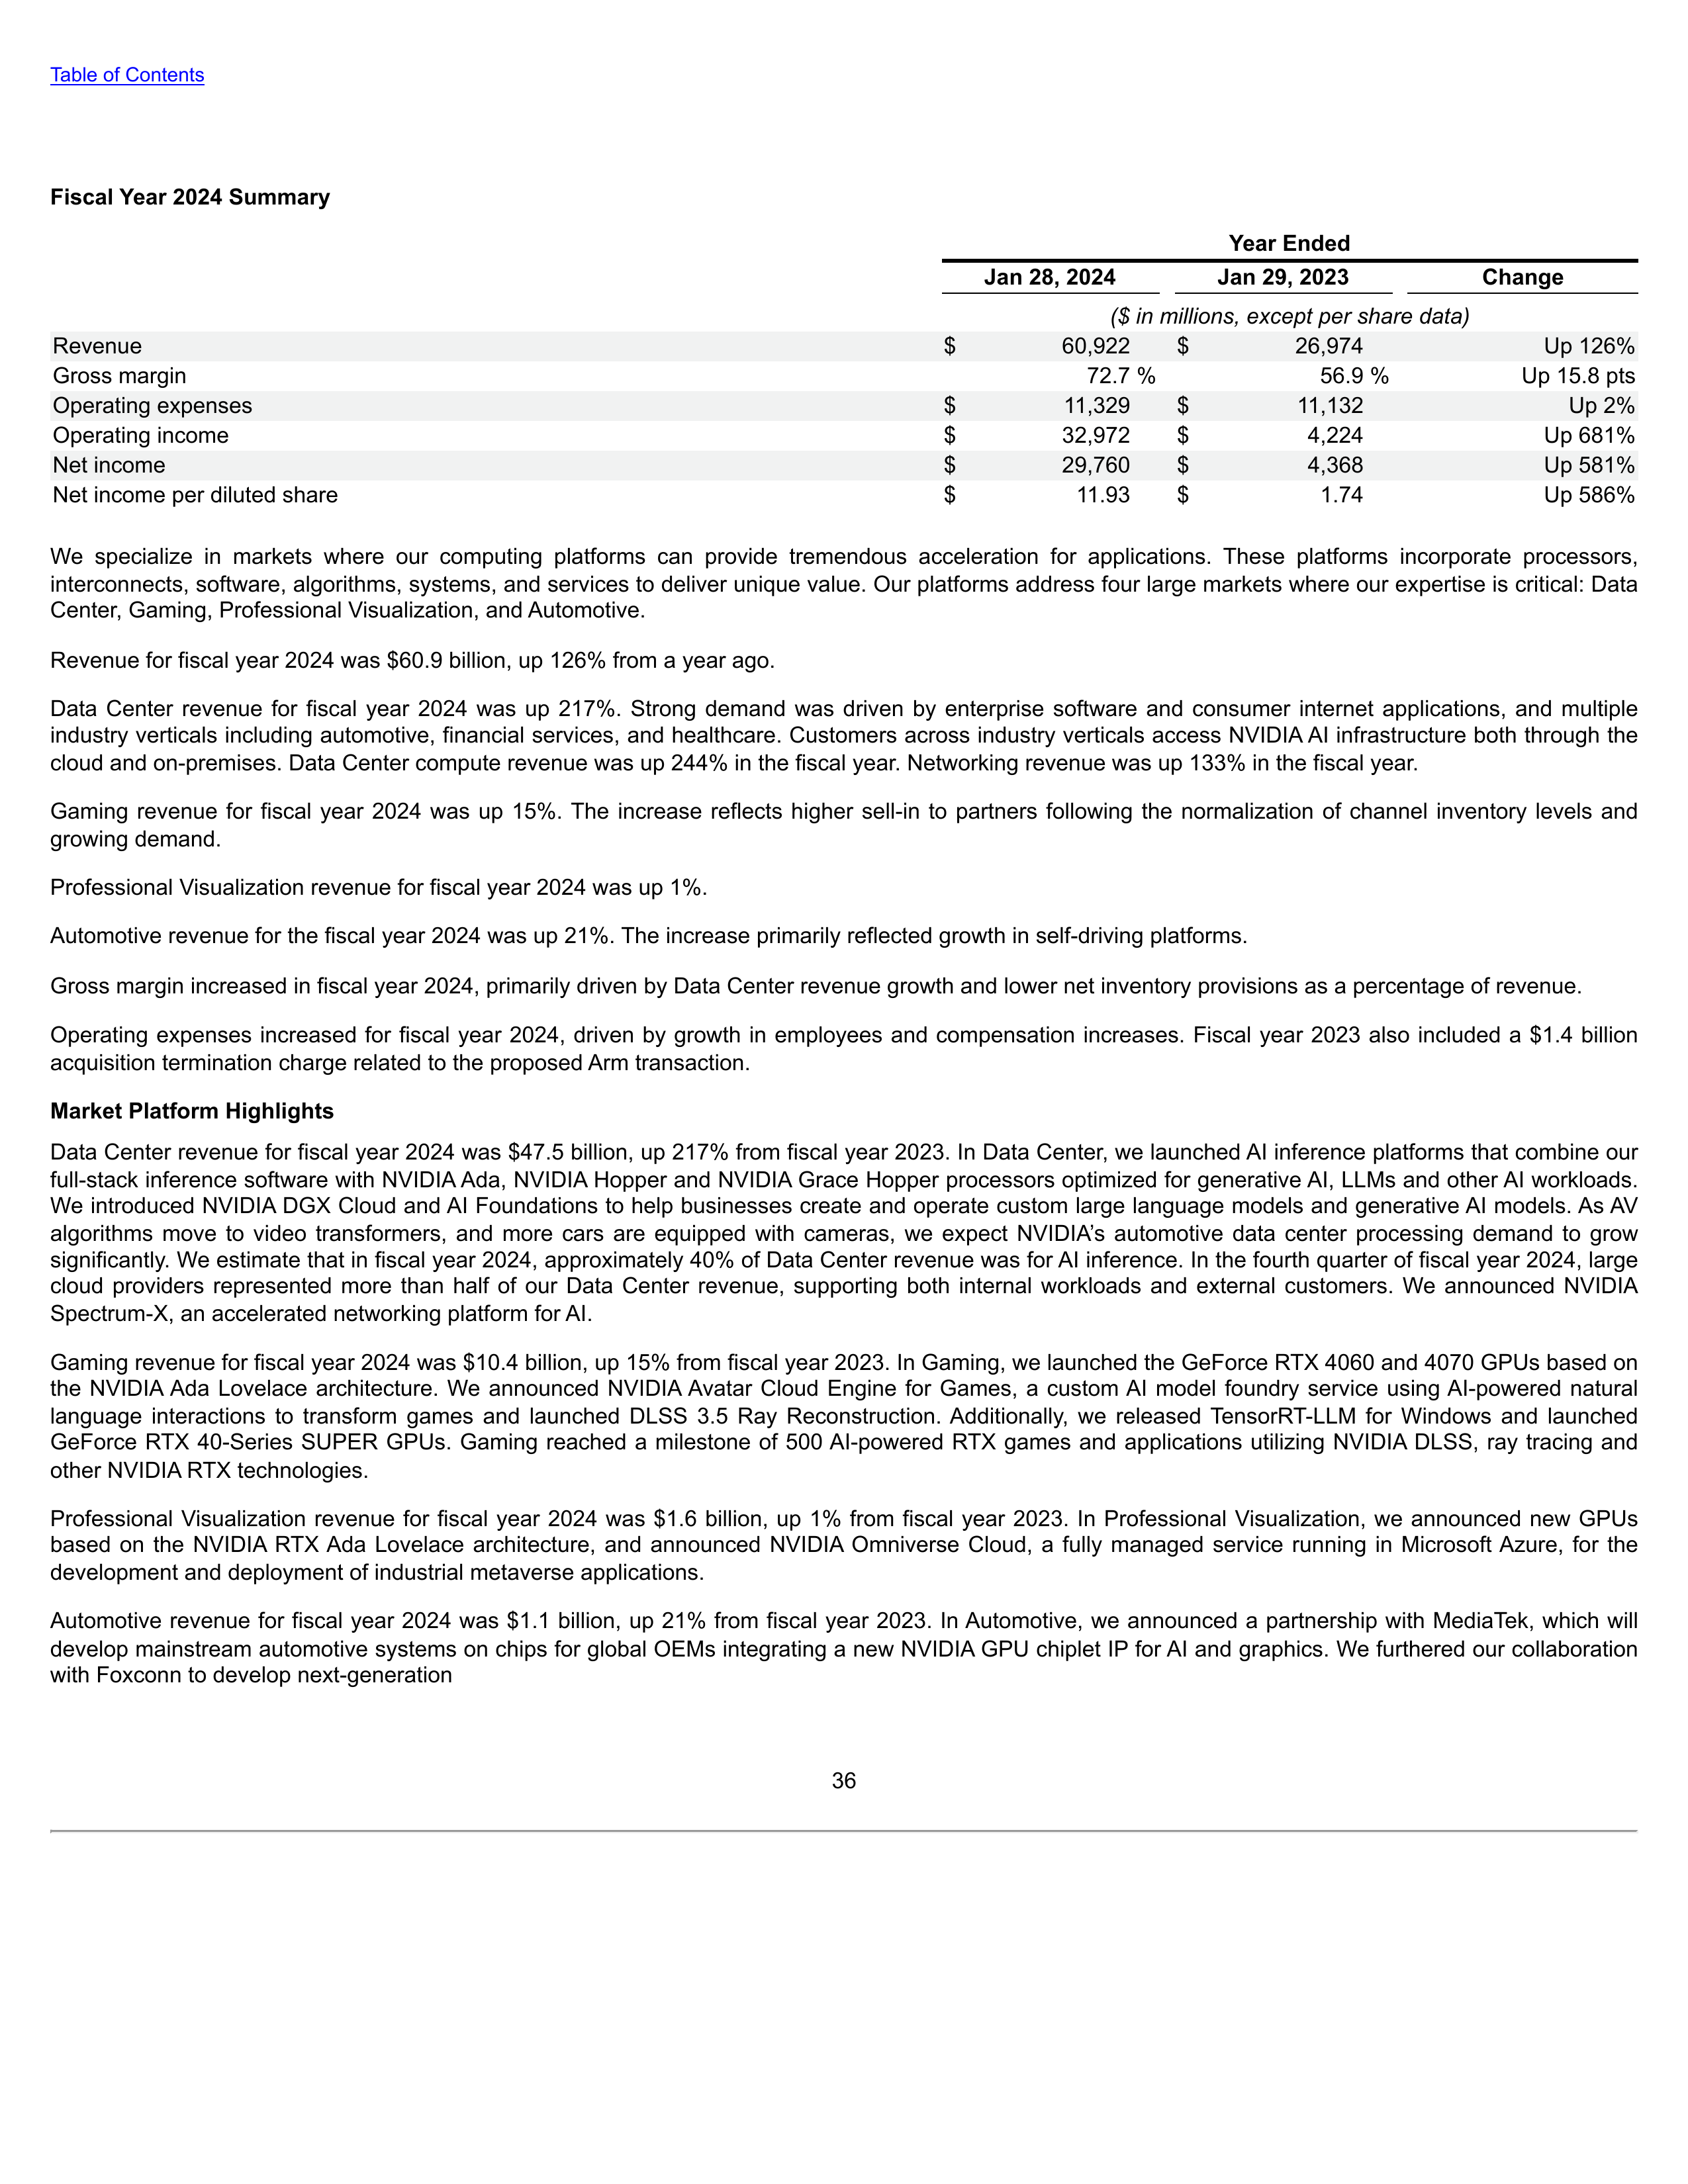

In [1]:
#conda install -c conda-forge poppler
import pdf2image #1.17.0

doc_img = pdf2image.convert_from_path("D:/CourseIAGenAI/git/iagenai/fmi-2025-05-nlp_llm/RAG/data/doc_nvidia.pdf", dpi=300, poppler_path = r"D:\Programs\poppler-24.08.0\Library\bin")

print("pages:", len(doc_img))
doc_img[35]

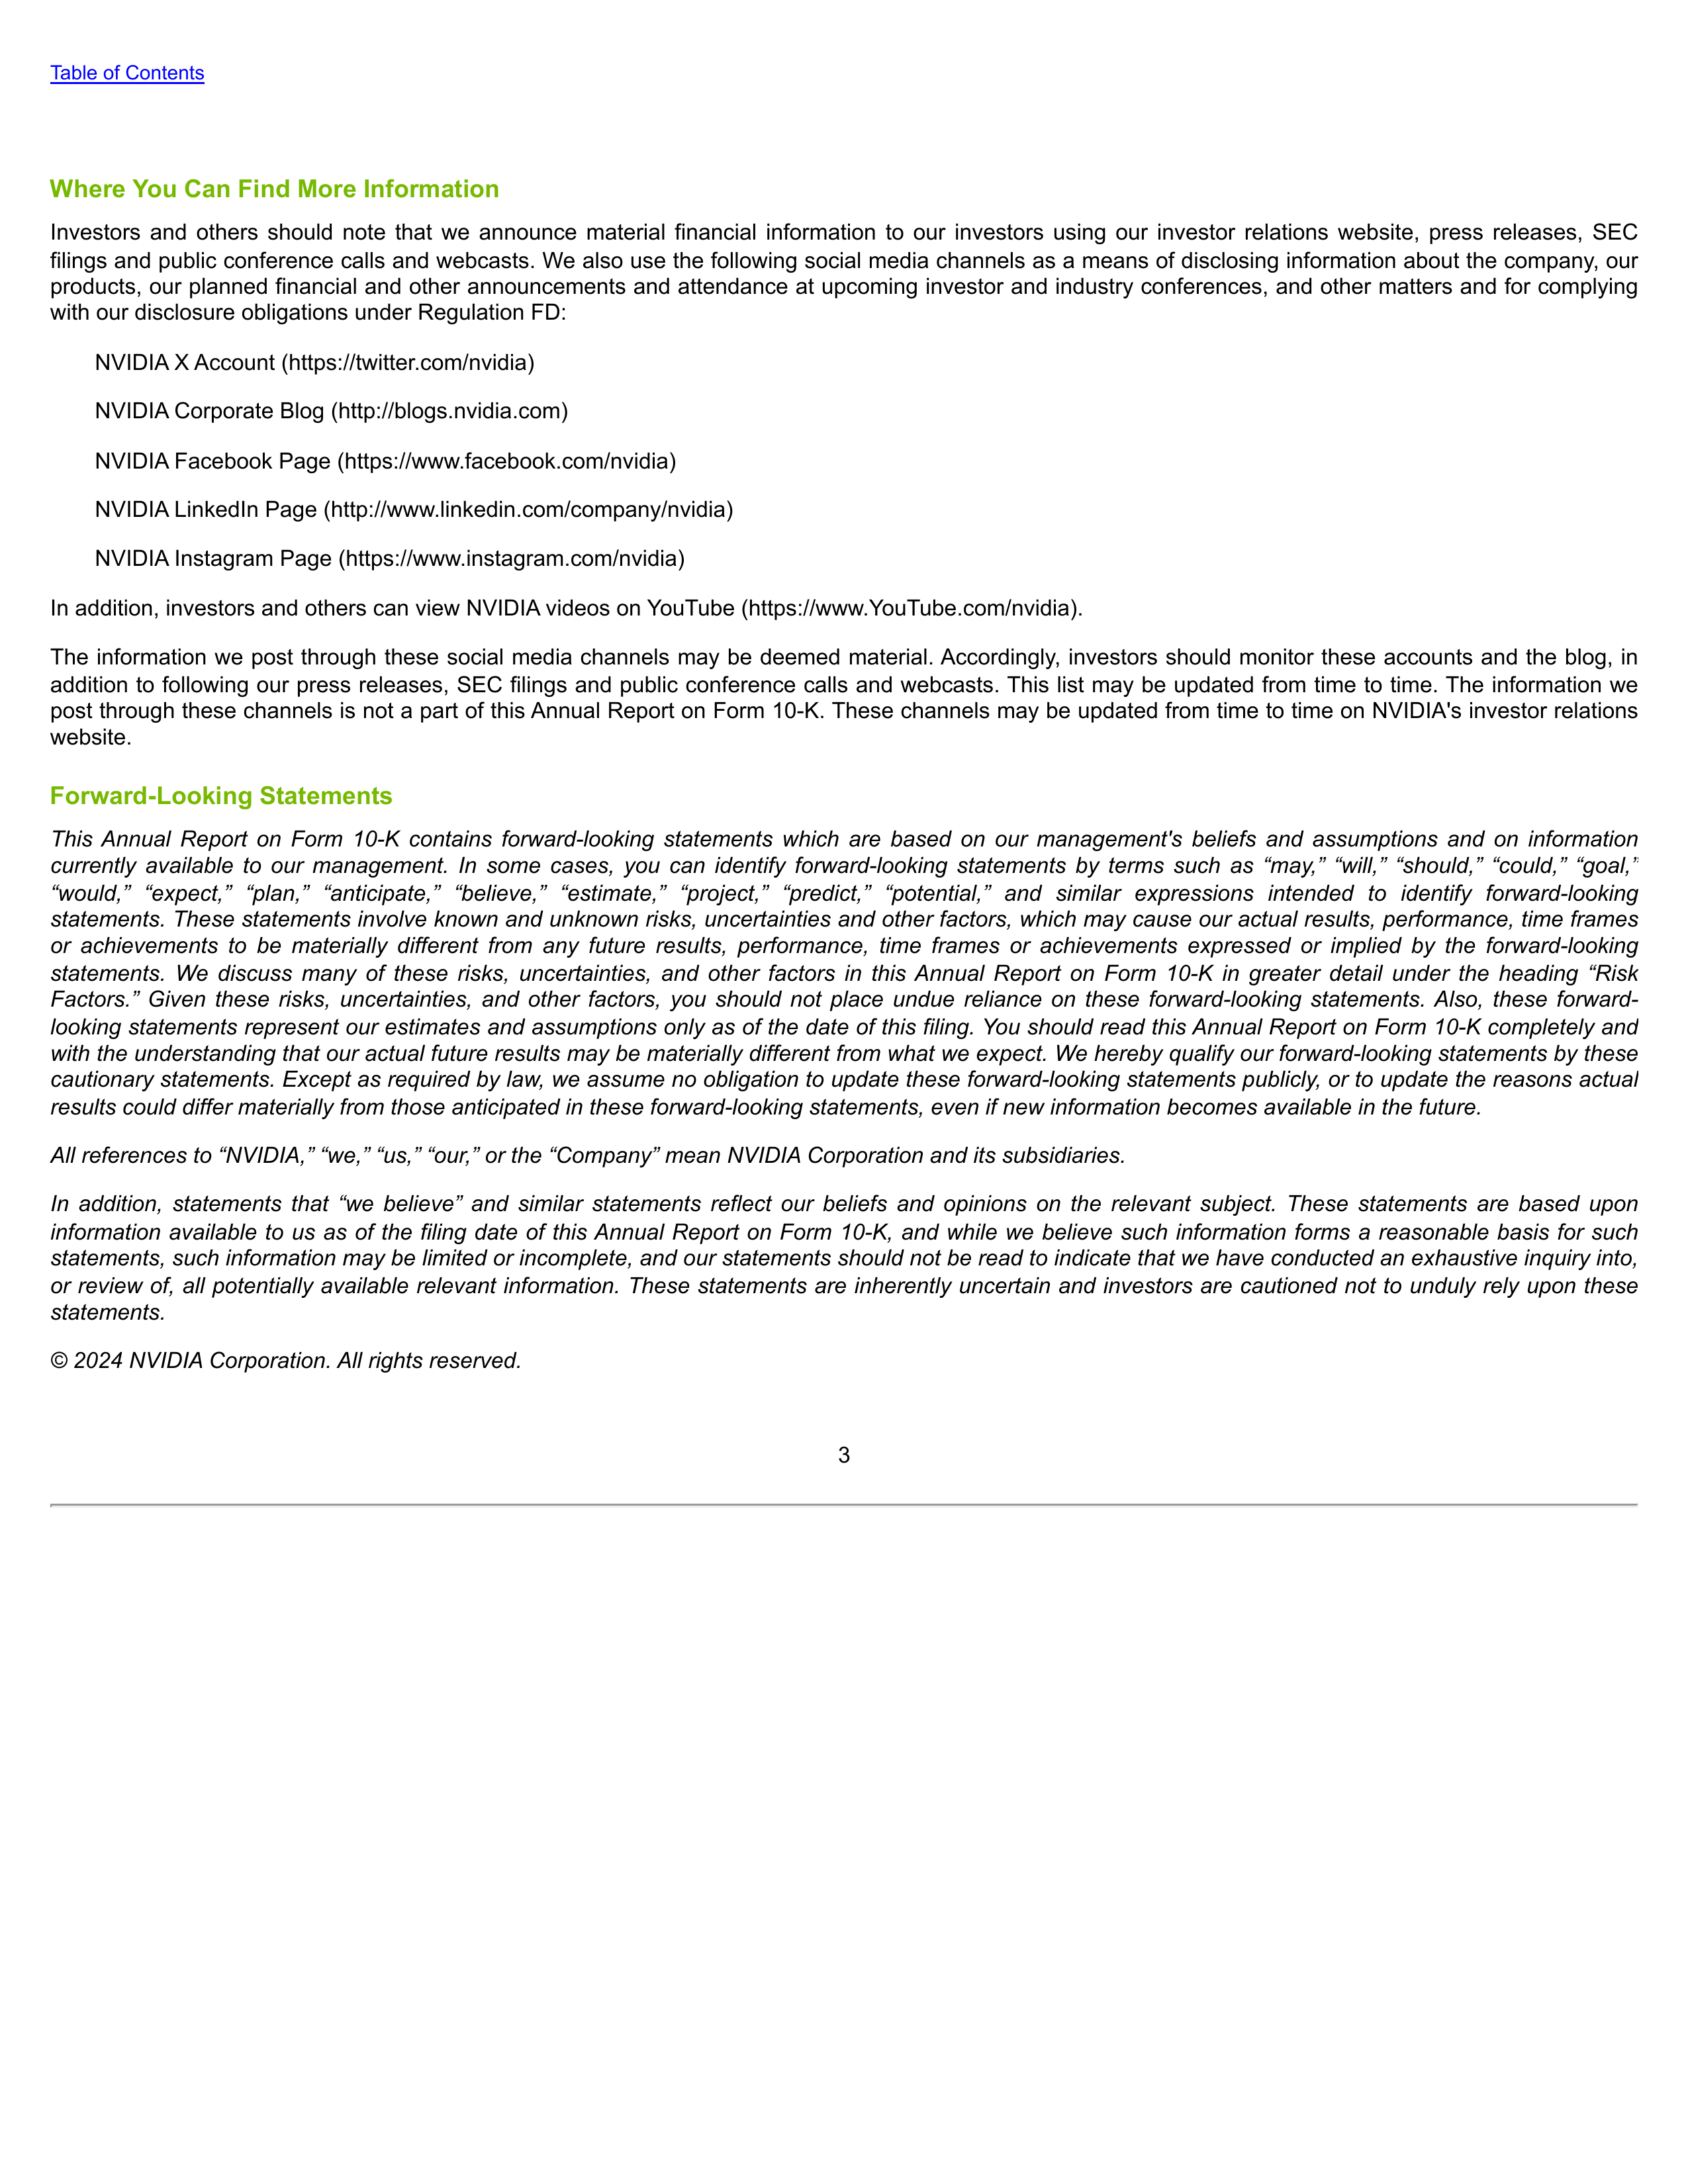

In [4]:
doc_img[2]

In [5]:
import pytesseract #0.3.13
from tqdm.notebook import tqdm

pytesseract.pytesseract.tesseract_cmd = r'D:\Program Files\Tesseract-OCR\tesseract.exe'

doc_txt = []
for page in tqdm(doc_img):
    text = pytesseract.image_to_string(page)
    doc_txt.append(text)

doc_txt[35]

  0%|          | 0/96 [00:00<?, ?it/s]

'Table of Contents\n\nFiscal Year 2024 Summary\n\nYear Ended\nJan 28, 2024 Jan 29, 2023 Change\n($ in millions, except per share data)\nRevenue $ 60,922 $ 26,974 Up 126%\nGross margin 72.7 % 56.9 % Up 15.8 pts\nOperating expenses $ 11,329 $ 11,132 Up 2%\nOperating income $ 32,972 $ 4,224 Up 681%\nNet income $ 29,760 $ 4,368 Up 581%\nNet income per diluted share $ 11.93 $ 1.74 Up 586%\n\nWe specialize in markets where our computing platforms can provide tremendous acceleration for applications. These platforms incorporate processors,\ninterconnects, software, algorithms, systems, and services to deliver unique value. Our platforms address four large markets where our expertise is critical: Data\nCenter, Gaming, Professional Visualization, and Automotive.\n\nRevenue for fiscal year 2024 was $60.9 billion, up 126% from a year ago.\n\nData Center revenue for fiscal year 2024 was up 217%. Strong demand was driven by enterprise software and consumer internet applications, and multiple\nindus

### Preprocessing

In [6]:
title_map = {
    "4-12":"Business",
    "13-33":"Risk Factors",
    "34-44":"Financials",
    "45-46":"Directors",
    "47-83":"Data"
}

In [7]:
lst_docs, lst_ids, lst_metadata = [], [], []
for n,page in enumerate(doc_txt):
    try:
        ## get title
        title = [v for k,v in title_map.items() if n in range(int(k.split("-")[0]), int(k.split("-")[1])+1)][0]
        ## clean page
        page = page.replace("Table of Contents","")
        ## get paragraph
        for i,p in enumerate(page.split('\n\n')):
            if len(p.strip())>5:
                lst_docs.append(p.strip())
                lst_ids.append(str(n)+"_"+str(i))
                lst_metadata.append({"title":title})
    except:
        continue

print(len(lst_docs), "=", len(lst_ids), "=", len(lst_metadata))

1081 = 1081 = 1081


In [8]:
for id,doc,meta in zip(lst_ids[375:378], lst_docs[375:378], lst_metadata[375:378]):
    print(id, "-", meta, "\n", doc, "\n")

35_1 - {'title': 'Financials'} 
 Fiscal Year 2024 Summary 

35_2 - {'title': 'Financials'} 
 Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586% 

35_3 - {'title': 'Financials'} 
 We specialize in markets where our computing platforms can provide tremendous acceleration for applications. These platforms incorporate processors,
interconnects, software, algorithms, systems, and services to deliver unique value. Our platforms address four large markets where our expertise is critical: Data
Center, Gaming, Professional Visualization, and Automotive. 



### LLM Generator

###### TEXT

In [10]:
import ollama #0.2.1

def keyword_generator(p, top=3):
    system = "Your main objective is to condense the content of the document into a concise summary of no more than 3 keywords, capturing the main points and themes. Produce ONLY 3 keywords, DO NOT generate more text."
    prompt = "summarize the following paragraph in 3 short keywords separated by comma(,):\n"+p + "\n"
    res = ollama.generate(model="llama3.2", system=system, prompt=prompt)["response"]
    #lst = [k.replace("\n"," ").strip() for k in res.split(",")][:top]
    #str = ", ".join(lst)
    return res.replace("\n"," ").strip()

# p = '''Professional artists, architects and designers use NVIDIA partner products accelerated with our GPUs and software platform for a range of creative and design
# use cases, such as creating visual effects in movies or designing buildings and products. In addition, generative Al is expanding the market for our workstation-
# class GPUs, as more enterprise customers develop and deploy Al applications with their data on-premises.'''
p = ''' Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586%'''
# p = '''We specialize in markets where our computing platforms can provide tremendous acceleration for applications. These platforms incorporate processors, interconnects,
# software, algorithms, systems, and services
#  to deliver unique value. Our platforms address four large markets where our expertise is critical: Data Center, Gaming, Professional Visualization, and Automotive.'''

print(keyword_generator(p))

Computing Platforms, Acceleration, Markets


In [11]:
for i,doc in tqdm(enumerate(lst_docs)):
    lst_metadata[i]["keywords"] = keyword_generator(doc)

0it [00:00, ?it/s]

In [12]:
for id,doc,meta in zip(lst_ids[375:378], lst_docs[375:378], lst_metadata[375:378]):
    print(id, "-", meta, "\n", doc, "\n")

35_1 - {'title': 'Financials', 'keywords': 'Fiscal Budget, Yearly Review, Government Finance'} 
 Fiscal Year 2024 Summary 

35_2 - {'title': 'Financials', 'keywords': 'Revenue, Gross Margin, Operating Income'} 
 Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586% 

35_3 - {'title': 'Financials', 'keywords': 'Accelerated Computing Markets'} 
 We specialize in markets where our computing platforms can provide tremendous acceleration for applications. These platforms incorporate processors,
interconnects, software, algorithms, systems, and services to deliver unique value. Our platforms address four large markets where our expertise is critical: Data
Center, Gaming, Professional Visualization, and Automotive. 



###### TABLE

In [13]:
table = lst_docs[376]
print("Table:\n", table)

prompt = f"Summarize the following table: {table}"
res = ollama.generate(model="llama3.2", prompt=prompt)["response"]

print("\nSummary:\n", res)

Table:
 Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586%

Summary:
 Here's a summary of the table:

* Revenue increased by 126% from $26.9 billion to $60.9 billion in one year.
* Gross margin improved by 15.8 percentage points, from 56.9% to 72.7%.
* Operating expenses remained relatively stable, increasing by only 2%.
* As a result, operating income increased by 681%, from $4.2 billion to $32.9 billion.
* Net income rose by 581%, from $4.3 billion to $29.8 billion.
* Most notably, net income per diluted share skyrocketed by 586%, from $1.74 to $11.93.

Overall, the company experienced significant revenue growth and improved profitability in the past year.


In [14]:
table = lst_docs[376]
print("Table:\n", table)

prompt = f"Give a concise summary of the following table: {table}"
res = ollama.generate(model="llama3.2", prompt=prompt)["response"]

print("\nSummary:\n", res)

Table:
 Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586%

Summary:
 The table shows the financial performance of a company for two consecutive years:

- Revenue increased by 126% from $26,974 to $60,922.
- Gross margin improved by 15.8 percentage points, from 56.9% to 72.7%.
- Operating income and net income grew significantly, with increases of 681% and 581%, respectively.
- Net income per diluted share rose 586% from $1.74 to $11.93.

These significant improvements indicate a substantial increase in the company's revenue and profitability over the two years.


###### IMAGES

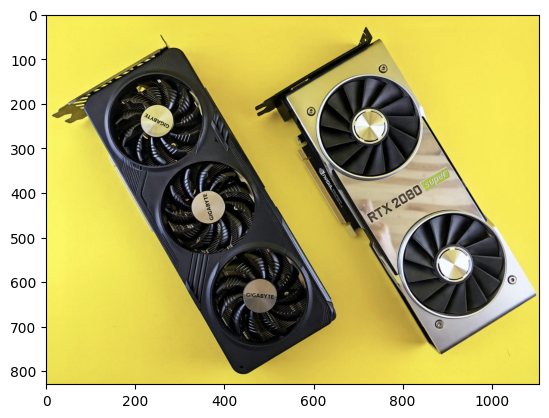

In [16]:
from matplotlib import image, pyplot

image_file = "D:/CourseIAGenAI/git/iagenai/fmi-2025-05-nlp_llm/RAG/data/image.png"

pyplot.imshow(image.imread(image_file))
pyplot.show()

In [17]:
## Encode the image into a string
import base64

def encode_image(path):
    with open(path, "rb") as file:
        return base64.b64encode(file.read()).decode('utf-8')

img = encode_image(image_file)
img[:1000]

'iVBORw0KGgoAAAANSUhEUgAABFQAAAM+CAYAAAA0NVXiAAAKrWlDQ1BJQ0MgUHJvZmlsZQAASImVlwdQU+kWgP9700NCS4iAlNCb9BZASggtgIJ0EIWQBAglxEBQsSPiCq4FFRFUBF0VUHBViiwiIoqFRUDB7oIsCsq6WLCh8i4whN19896bd2bOnO+ee/5zzv/P/WfOBYAszxGJUmB5AFKFGeIgb3d6RGQUHTcMMIAG8EAd6HC46SJmYKA/QGTW/l0+9AFoyt4xncr17+//qyjw+OlcAKBAhON46dxUhM8j+pIrEmcAgDqC+HVWZoimuA1hqhhpEOH7U5www6NTHDfNaDAdExLEQpgKAJ7E4YgTACDRET89k5uA5CG5IWwh5AmECIsQdklNTeMhfAZhQyQG8ZGm8jPi/pIn4W8546Q5OZwEKc/sZVrwHoJ0UQpn9f95HP9bUlMkszX0ESUlin2CEKuInNn95DQ/KQvjFgfMsoA3HT/NiRKf0FnmprOiZpnH8fCTrk1Z7D/L8QIvtjRPBjtklvnpnsGzLE4LktaKF7OYs8wRz9WVJIdK/Yl8tjR/VmJI+CxnCsIWz3J6crDfXAxL6hdLgqT984Xe7nN1vaR7T03/y34FbOnajMQQH+neOXP984XMuZzpEdLeeHwPz7mYUGm8KMNdWkuUEiiN56d4S/3pmcHStRnIBzm3NlB6hkkc38BZBiyQBlIQFQM68EeePADI4K/KmNoIK020WixISMygM5EbxqezhVyzBXQrCysbAKbu68zn8I42fQ8h2s05X/YTAJwjJycnm+Z8/sh5nB8GgDg65zOoAoDcDMD1LVyJOHPGN32XMIAI5AAVqAANoAMMgSmwAnbACbgBT+ALAkAIiATLARckglSk85VgLdgEckE+2AX2gWJQCo6Ck+A0OAvqQRO4DK6BW6AL9IJHoB8MgVdgDHwAExAE4SAyRIFUIE1IDzKBrCAG5AJ5Qv5QEBQJxUIJkBC

In [19]:
prompt = "describe the image"
res = ollama.generate(model="llama3.2-vision:11b", prompt=prompt, images=[img])["response"]
print(res)

The image shows two graphics cards, one black and one silver, placed side by side on a yellow surface. The purpose of the image is to compare and contrast the two graphics cards.

* Two graphics cards are shown in the image:
	+ The black graphics card is on the left.
	+ The silver graphics card is on the right.
* The graphics cards have different designs:
	+ The black graphics card has a more angular design with a flat top and bottom.
	+ The silver graphics card has a more curved design with a rounded top and bottom.
* The graphics cards have different logos:
	+ The black graphics card has a "GIGABYTE" logo on the top.
	+ The silver graphics card has a "NVIDIA" logo on the top.

The main difference between the two graphics cards is their design and logo. The black graphics card has a more angular design and a "GIGABYTE" logo, while the silver graphics card has a more curved design and an "NVIDIA" logo. This suggests that the two graphics cards are from different manufacturers or have d

In [20]:
## qwen3-vl:8b
prompt = "describe the image"
res = ollama.generate(model="qwen3-vl:8b", prompt=prompt, images=[img])["response"]
print(res)

The image features two high-performance graphics cards placed against a vibrant yellow background.  

- **Left Graphics Card**: This is a **Gigabyte** model, identifiable by the "GIGABYTE" branding on the central hubs of its three fans. The card has a sleek, black design with three vertically aligned cooling fans. Each fan has a dark, ribbed structure, and the card includes a metallic mounting bracket at the top.  

- **Right Graphics Card**: This is an **NVIDIA RTX 2080 Super** model. It features a polished, metallic silver (or brushed aluminum) finish with two fans (the top fan is larger). The card prominently displays "RTX 2080" in bold text and a green "Super" badge near the top. The fans have metallic centers, and the card includes visible PCIe connectors and branding elements like "NVIDIA" on the side.  

The bright yellow background contrasts sharply with the cards’ dark and metallic tones, emphasizing their design details and making the components stand out clearly. The overall

###### PLOTS

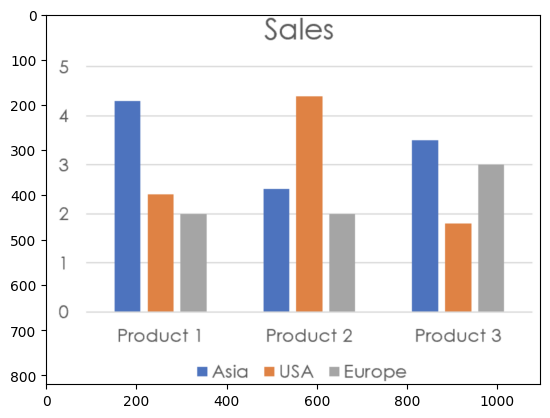

In [21]:
image_file = "D:/CourseIAGenAI/git/iagenai/fmi-2025-05-nlp_llm/RAG/data/plot.png"

pyplot.imshow(image.imread(image_file))
pyplot.show()

In [22]:
img = encode_image(image_file)

prompt = "Describe the image in detail. Be specific about graphs, such as bar plots"
res = ollama.generate(model="qwen3-vl:8b", prompt=prompt, images=[img])["response"]
print(res)

The image is a **grouped bar chart** titled "Sales," designed to compare regional sales across three products. Here’s a detailed breakdown:  

### **Graph Structure**  
- **Title**: "Sales" (centered at the top).  
- **X-axis**: Labels three products: *Product 1*, *Product 2*, *Product 3*.  
- **Y-axis**: Represents "Sales" with a linear scale from **0 to 5** (tick marks at intervals of 1).  
- **Legend**: Positioned at the bottom, with color coding:  
  - **Blue** = Asia  
  - **Orange** = USA  
  - **Gray** = Europe  

---

### **Bar Details by Product**  
Each product has **three vertical bars** (one for each region), grouped side-by-side. The height of each bar corresponds to the sales value (as read from the y-axis):  

#### **Product 1**  
- **Asia (blue)**: Bar height = **4** (tallest bar for this product).  
- **USA (orange)**: Bar height = **2**.  
- **Europe (gray)**: Bar height = **2**.  

#### **Product 2**  
- **Asia (blue)**: Bar height = **2.5**.  
- **USA (orange)**: Ba

### Database

In [23]:
import chromadb #1.4.0

db = chromadb.PersistentClient(path="D:/CourseIAGenAI/git/iagenai/fmi-2025-05-nlp_llm/RAG/chroma")
db.list_collections()

[Collection(name=nvidia)]

In [24]:
collection_name = "nvidia"

if collection_name in [c.name for c in db.list_collections()]:
    db.delete_collection(collection_name)
    print("--- deleted ---")

collection = db.get_or_create_collection(name=collection_name, 
                                         embedding_function=chromadb.utils.embedding_functions.DefaultEmbeddingFunction())

collection.add(documents=lst_docs, ids=lst_ids, metadatas=lst_metadata, 
               images=None, embeddings=None)

collection.peek(1)

--- deleted ---


{'ids': ['4_1'],
 'embeddings': array([[-9.74981859e-02, -3.10074147e-02,  2.04683430e-02,
          4.41562794e-02,  4.87011373e-02, -6.32695034e-02,
         -1.00582883e-01,  1.83412060e-02, -2.72620078e-02,
         -1.23763876e-02, -1.40804425e-01, -6.21848330e-02,
         -4.22603153e-02, -6.50530541e-03, -3.72276902e-02,
          4.71971184e-02, -1.06208641e-02, -4.11713421e-02,
         -3.45307365e-02, -1.04052447e-01, -1.89929698e-02,
          2.97947209e-02, -1.96872856e-02, -3.87388393e-02,
          2.22827606e-02,  2.71929260e-02, -5.73482476e-02,
         -2.27755047e-02, -1.79021489e-02,  4.55296859e-02,
          5.34584606e-03,  5.96850067e-02, -1.54073853e-02,
          1.26382085e-02, -3.26076113e-02,  2.27996614e-02,
         -5.38884774e-02, -6.75361007e-02, -2.88906842e-02,
         -5.68180904e-02,  3.26938666e-02, -2.70926431e-02,
          1.37217902e-02,  5.80371693e-02,  8.50114673e-02,
          6.93315221e-03,  2.38496121e-02,  2.01993249e-02,
         

In [25]:
query = "how much is the revenue?"
collection.query(query_texts=[query])

{'ids': [['78_13',
   '78_7',
   '54_11',
   '54_13',
   '37_1',
   '39_2',
   '35_4',
   '78_12',
   '69_5',
   '70_1']],
 'embeddings': None,
 'documents': [['Total revenue',
   'Total revenue $ 60,922 $ 26,974 $ 26,914',
   'Revenue Recognition',
   'Product Sales Revenue',
   'Revenue Recognition\nRevenue Allowances',
   'Concentration of Revenue',
   'Revenue for fiscal year 2024 was $60.9 billion, up 126% from a year ago.',
   'Revenue: (In millions)\nData Center 47,525 15,005 $ 10,613\nGaming 10,447 9,067 12,462\nProfessional Visualization 1,553 1,544 2,111\nAutomotive 1,091 903 566\nOEM and Other 306 455 1,162\n60,922 26,974 $ 26,914',
   '(2) Deferred revenue primarily includes customer advances and deferrals related to support for hardware and software, license and development arrangements, and cloud services. $233 million and\n$35 million of the balance in fiscal 2024 and 2023 respectively, related to customer advances.',
   'invoiced in future periods. Revenue allocated to 

In [27]:
res_db = collection.query(query_texts=[query])["documents"][0][0:10]
context = ' '.join(res_db).replace("\n", " ")
context

'Total revenue Total revenue $ 60,922 $ 26,974 $ 26,914 Revenue Recognition Product Sales Revenue Revenue Recognition Revenue Allowances Concentration of Revenue Revenue for fiscal year 2024 was $60.9 billion, up 126% from a year ago. Revenue: (In millions) Data Center 47,525 15,005 $ 10,613 Gaming 10,447 9,067 12,462 Professional Visualization 1,553 1,544 2,111 Automotive 1,091 903 566 OEM and Other 306 455 1,162 60,922 26,974 $ 26,914 (2) Deferred revenue primarily includes customer advances and deferrals related to support for hardware and software, license and development arrangements, and cloud services. $233 million and $35 million of the balance in fiscal 2024 and 2023 respectively, related to customer advances. invoiced in future periods. Revenue allocated to remaining performance obligations, which includes deferred revenue and amounts that will be invoiced and recognized as revenue in future periods, was $1.1 billion as of January 28, 2024. We expect to recognize approximatel

### LLM Chat

In [28]:
# Chat with Context only
res = ollama.chat(model="llama3.2", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using only \
                                                         the folling information: \n"+context},
                            {"role":"user", "content":query}])
print(res["message"]["content"])

The total revenue for fiscal year 2024 was $60,922 million.


In [29]:
# Chat with knowledge + Context
res = ollama.chat(model="llama3.2", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using your knowledge \
                                                         and the folling additional information: \n"+context},
                            {"role":"user", "content":query}])
print(res["message"]["content"])

The total revenue was $60,922 million in fiscal year 2023.


In [34]:
# Chat Stream
res = ollama.chat(model="llama3.2", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using your knowledge \
                                                         and the folling additional information: \n"+context},
                            {"role":"user", "content":query}],
                  stream=True)
for chunk in res:
    print(chunk["message"]["content"], end="")

The total revenue for fiscal year 2024 was $60,922 million, which can also be expressed as $60.9 billion. 

Here's a breakdown of the revenue by segment:

1. Data Center: $47,525 million
2. Gaming: $10,447 million
3. Professional Visualization: $1,553 million
4. Automotive: $1,091 million
5. OEM and Other: $306 million